# <span style="color: #4CAF50; font-family: 'Arial, sans-serif';">INDIA START-UP FUNDING ANALYSIS (2018 to 2021) - </span>


# INTRODUCTION
 The focus of this analysis is on the startup environment in India. This means examining various aspects of startups, including their growth, funding, and other trends. This analysis will cover a period of four years, from 2018 to 2021, which allows for a comprehensive exploration of trends and changes within the startup ecosystem.  The analysis will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework consisting of six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. 

# Business Understanding:
1. Identify Key Trends:  
Objective: Uncover and understand the key trends in the Indian startup ecosystem over the four-year period (2018-2021).  
Goals: Identify sectors experiencing the most significant growth, the distribution of funding across rounds, and the geographic distribution of startup activities.
2. Evaluate Funding Patterns:  
Objective: Analyze funding patterns to understand how different sectors, rounds, and company activities attract investment.  
Goals: Identify sectors receiving the highest and lowest funding, explore the distribution of funding amounts, and understand the most common types of company activities that attract investment.
3. Assess Investor Involvement:  
Objective: Understand the role and impact of investors in the Indian startup ecosystem.  
Goals: Identify the most active investors, assess their investment patterns, and understand the correlation between investor involvement and 
startup success.

# Project Goals:
1. Clean and Prepare Data:  
Objective: Ensure the dataset is cleaned and prepared for analysis.  
Goals: Handle missing values, standardize data types, and address any inconsistencies or outliers.  
2. Perform Exploratory Data Analysis (EDA)  
Objective: Gain insights through exploratory analysis.  
Goals: Visualize trends over time, explore distributions of funding amounts, and identify notable patterns in the data.  
3. Communicate Findings:  
Objective: Effectively communicate insights and findings.  
Goals: Create clear and concise visualizations, reports, and presentations to convey key findings to stakeholders.
4. Provide Recommendations:  
Objective: Offer actionable recommendations based on the analysis.  
Goals: Suggest strategies for startups, investors, and policymakers based on identified trends and opportunities.

# HYPOTHESIS TESTING 
1. Null Hypothesis (HO) - The amount of funding for companies is not influenced by the company's industry.
2. Alternate Hypothesis (H1) - The amount of funding for companies is influenced by the company's industry.

# Business Questions
1. How does the distribution of funding amounts vary across different industries?
2. Are certain industries more consistent in funding amounts, indicating stability or predictability?
3. Can we identify specific industries that tend to attract higher funding amounts?
4. Are there outliers in the funding amounts within certain industries?
5. Does the location influence the funding in certain industries

--

# Indian Startup Analysis Journey

#### Importing Necessary Libraries

In [26]:
# Importing the necessary libraries
import pyodbc     
#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values    
import pandas as pd
from pandas_summary import DataFrameSummary
import warnings 
import re
import numpy as np
warnings.filterwarnings('ignore')
import squarify
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

#### Loading the environment 

The 2021 and 2020 datasets could only be loaded from an online database. Below is the environment to load the dataframes

In [27]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
# server = environment_variables.get("server")
# database = environment_variables.get("database")
# username = environment_variables.get("username")
# password = environment_variables.get("password")

In [28]:
# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [29]:
# Use the connect method of the pyodbc library and pass in the connection string.
# connection = pyodbc.connect(connection_string)

In [30]:
# importing the data sets to the environment. The first two are SQL queries to pull the 2020 & 2021 data from the server
# The data3 & 4 are downloaded data sets thus importing them using pandas read_csv() for the 2018 & 2019 data sets
# query1 = "SELECT * FROM dbo.LP1_startup_funding2021"
# data1 = pd.read_sql(query1, connection)
# query2 = "SELECT * FROM dbo.LP1_startup_funding2020"
# data2 = pd.read_sql(query2, connection)

### Data Frames Importation:  
The 2021 and 2020 dataframes were converted into excel files.  
The four files were all cleaned in Excel and the loaded for analysis


In [31]:
df_2018 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding18.xlsx")
df_2019 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding19.xlsx")
df_2020 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding20.xlsx")
df_2021 = pd.read_excel("C:/Users/EWamathai/Desktop/Indian Startup Ecosystem/files/startup_funding21.xlsx")

### Checking Data sets loaded on to notebook

In [32]:
# Checking 2018 dataframe
df_2018.head(2)

,Company Name,Industry,Round/Series,Amount,city,About Company
0,Ola,Apps,Unspecified,50000000.0,Kormangala,Ola is a mobile app that brings together cab d...
1,Walmart India,Retail,Unspecified,37680000.0,Gurgaon,Wal-Mart India Private Limited is a wholly own...


In [33]:
# Checking 2019 dataframe
df_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($,Stage
0,Appnomic,NaN,Bengaluru,Saas,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,22000000,Unspecisfied
1,Asteria Aerospace,2011.0,Bengaluru,Robotics & Ai,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000,Unspecisfied


In [34]:
# Checking 2020 dataframe
df_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,1Mg,2015.0,Gurugram,Healthtech,Online pharmacy,"Prashant Tandon, Gaurav Agarwal, Vikas Chauhan",Bill & Melinda Gates Foundation,9900000,unspecified
1,3One4 Capital,2016.0,Bangalore,Venture capital,Use transformative capital and a deep involvem...,"Pranav Pai, Siddarth Pai",NaN,100000000,unspecified


In [35]:
# Checking 2021 dataframe
df_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,1Bridge,2016.0,Bengaluru,Consumer Goods,Village Commerce Network - Bridging Aspiration...,"Madan Padaki, Anil Kumar, M Chakrawarty",C4D Partners,2500000,unspecified
1,1K Kirana Bazaar,2018.0,Gurugram,Retail,India's First and Largest Network of Small-Tow...,"Abhishek Halder, Anilesh Yadav, Kumar Sangeetesh","Info Edge, FalconEdge",7000000,unspecified


#### Cleaning the 2018 dataframe
The cleaning process will follow the following procedure  
1. Checking the data-frame info
2. Checking for duplicates
3. Renaming the columns to future data concat with the other dataframes
4. cleaning the columns for any irregular data types and outliers

In [36]:
# Checking the 2018 data-frame info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   377 non-null    object 
 1   Industry       357 non-null    object 
 2   Round/Series   377 non-null    object 
 3   Amount         377 non-null    float64
 4   city           377 non-null    object 
 5   About Company  377 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.8+ KB


Observation: Based on the info provided in the df_2018 DataFrame:  
1. There are 377 entries in the dataset, indicating information about 377 companies.
2. The 'Industry' column has 357 non-null entries, suggesting that there are 20 missing values in this column.
3. The 'Round/Series' column has 376 non-null entries, meaning there is one missing value in this column.
4. The 'Amount' column contains financial data of funding amounts and is of float64 data type.
5. The 'Company Name', 'Industry', 'Round/Series', 'city', and 'About Company' columns are of object data type, indicating text or categorical data.
6. The 'city' column represents the city where each company is located.
7. The 'About Company' column contains descriptions or information about each company.


#### Cleaning the column names

In [37]:
# Renaming the columns and puting them in lowercase
new_column_names = {'Company Name': 'company_name', 'Industry': 'industry', 'Round/Series' : 'series',
                    'Amount': 'amount', 'city': 'location', 'About Company': 'about'}
df_2018 = df_2018.rename(columns=new_column_names)

#### Checking for duplicates

In [38]:
# Checking for duplicates in the 2018 data
duplicates = df_2018[df_2018.duplicated()]

if duplicates.empty:
    print("Do nothing, there are 0 duplicates.")
else:
    # Remove duplicates
    df_2018_cleaned = df_2018.drop_duplicates()
    print("Cleaned the DataFrame by removing duplicates.")

Do nothing, there are 0 duplicates.


#### Cleaning 2018 data column by column

In [39]:
# Cleaning company_name column
print(f"Number of unique companies in the 2018 dataframe is : {df_2018['company_name'].nunique()}")

Number of unique companies in the 2018 dataframe is : 377


##### Observation:
1.The company name column appears to be clean as is as there are no duplicated company names with 377 unique companies

In [40]:
# Checking the Industry column
print(f"Number of unique industries in 'industry' column: {df_2018['industry'].nunique()}")

Number of unique industries in 'industry' column: 122


In [41]:
df_2018['industry'].value_counts()

industry
Financial Services    22
E-Commerce            18
Health Care           18
Finance               16
Automotive            15
                      ..
Farming                1
Classifieds            1
Audio                  1
Online Portals         1
Digital Marketing      1
Name: count, Length: 122, dtype: int64

Observation:  
The industry column appears to have multiple industries with financial services with the highest frequency(22). This shall be left as is to be cleaned in the merged dataframe

In [42]:
# To clean the series column 
# First checking for unique values
print(f"Unique values in the 'series' column is {df_2018['series'].nunique()}")

Unique values in the 'series' column is 20


Observation:  
The series column has 20 unique values. this will be left as is

In [43]:
# To clean the amount column
# First check the unique entries
df_2018['amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 377 entries, 0 to 376
Series name: amount
Non-Null Count  Dtype  
--------------  -----  
377 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


Observation:  
1. There are 377 non-null entries in the amount column, indicating that there are no missing values.
2. The data type is float64, which is a numeric data type thus clean

In [44]:
# Cleaning the location column
# Checking for unique values
df_2018['location'].unique()

array(['Kormangala', 'Gurgaon', 'Guindy', 'Jaipur', 'Chennai',
       'Bengaluru', 'Mumbai', 'Indore', 'Hyderabad', 'Haryana',
       'Kalpakkam', 'Delhi', 'Noida', 'Alleppey', 'Faridabad', 'Pune',
       'Kolkata', 'Ahmedabad', 'Margão', 'Andheri', 'Bhopal', 'Belgaum',
       'Mylapore', 'Kanpur', 'Thane', 'Coimbatore', 'Kalkaji', 'Guntur',
       'Jodhpur', 'Ghaziabad', 'Kannur', 'Kota'], dtype=object)

Observation:  
The 'location' column in the df_2018 DataFrame includes entries representing various cities and regions in India. Each entry is the City the company is domiciled at.


In [45]:
# clean the about
# Check for unique values
print(f"Unique values in the 'about' column is: {df_2018['about'].nunique()}")

Unique values in the 'about' column is: 376


Observation:  
The about column will be left as is since the values are 376 unique values all object formats

In [46]:
# Checking data info for final cleaning
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  377 non-null    object 
 1   industry      357 non-null    object 
 2   series        377 non-null    object 
 3   amount        377 non-null    float64
 4   location      377 non-null    object 
 5   about         377 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.8+ KB


#### Adding data year column to 2018 
This column will act as the year column which the data was collected

In [47]:
# adding the data year column for 2018
df_2018['data_year'] = pd.to_datetime('2018', format='%Y')

In [48]:
# Cleaning object columns to capitalize the entries
# function to format text with initial uppercase and the rest lowercase
def format_text(entry):
    if isinstance(entry, str):  # Check if the entry is a string
        return entry.capitalize()
    else:
        return entry
# Apply the formatting function to each column with object data
columns_to_format = ['company_name', 'industry', 'series', 'about', 'location',]
for column in columns_to_format:
    df_2018[column] = df_2018[column].apply(format_text)

#### Displaying clean 2018 dataframe

In [49]:
# displaying clean 2018 datframe
df_2018.head(5)

,company_name,industry,series,amount,location,about,data_year
0,Ola,Apps,Unspecified,50000000.0,Kormangala,Ola is a mobile app that brings together cab d...,2018-01-01
1,Walmart india,Retail,Unspecified,37680000.0,Gurgaon,Wal-mart india private limited is a wholly own...,2018-01-01
2,Veritas finance,Financial services,Unspecified,30000000.0,Guindy,Veritas finance has been promoted with a prima...,2018-01-01
3,Rays power infra,Energy,Unspecified,29220000.0,Jaipur,Rays power infra is a leading integrated solar...,2018-01-01
4,Vivriti capital,Financial services,Unspecified,28500000.0,Chennai,Vivriti capital is an online platform for inst...,2018-01-01


## Performing EDA on clean 2018 dataframe

In [50]:
# 1. Summary Statistics
summary_stats = df_2018.describe(include="all")
summary_stats

,company_name,industry,series,amount,location,about,data_year
count,377,357,377,3.770000e+02,377,377,377
unique,377,122,20,NaN,32,376,NaN
top,Ola,Financial services,Seed,NaN,Bengaluru,Algorithmic trading platform.,NaN
freq,1,22,174,NaN,158,2,NaN
mean,NaN,NaN,NaN,1.761903e+07,NaN,NaN,2018-01-01 00:00:00
min,NaN,NaN,NaN,8.766000e+02,NaN,NaN,2018-01-01 00:00:00
25%,NaN,NaN,NaN,5.000000e+05,NaN,NaN,2018-01-01 00:00:00
50%,NaN,NaN,NaN,1.300000e+06,NaN,NaN,2018-01-01 00:00:00
75%,NaN,NaN,NaN,5.000000e+06,NaN,NaN,2018-01-01 00:00:00
max,NaN,NaN,NaN,1.000000e+09,NaN,NaN,2018-01-01 00:00:00


Observations:
1. company_name:
All entries in the company_name column are unique, indicating no repetition.The top entry is "TheCollegeFever."
2. industry: The industry column has 122 occurrences with the top industry being "Financial Services," appearing 22 times.
3. series: The most frequent funding series is "Seed," occurring 174 times. There are 20 unique funding series in the dataset.
4. amount: There are 377 non-null entries in the amount column.The mean funding amount is approximately 17,616,770, while the standard deviation is 77,972,610.
5. about: There are 377 unique entries in the about column.The most frequent description is "Algorithmic trading platform," appearing twice.
6. location: There are 158 occurrences of "Bengaluru" in the location column, making it the most frequent city. There are 32 unique cities in the dataset.


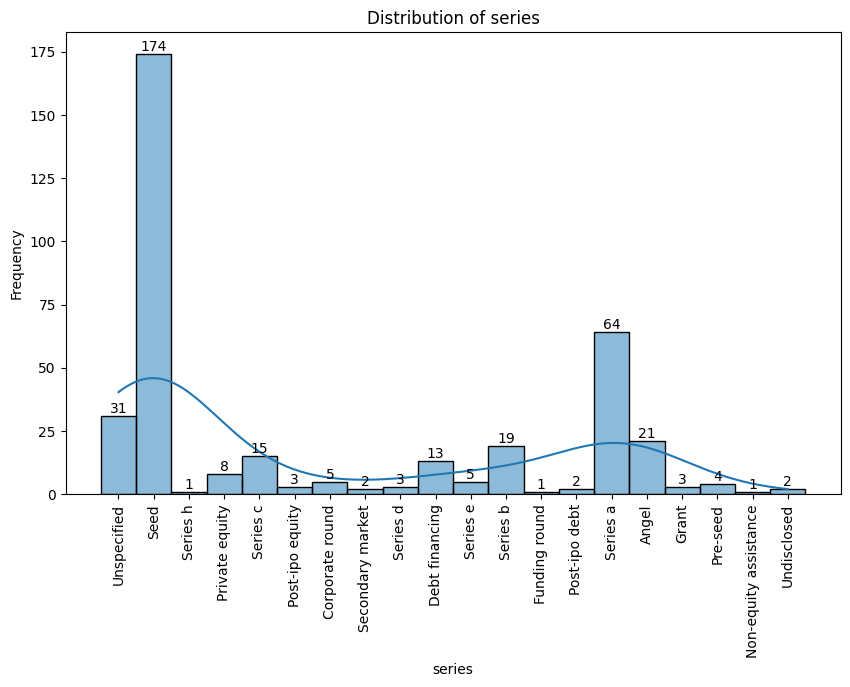

In [51]:
# 2. Distribution of series (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_2018['series'], bins=10, kde=True)
# Add data labels
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribution of series')
plt.xlabel('series')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

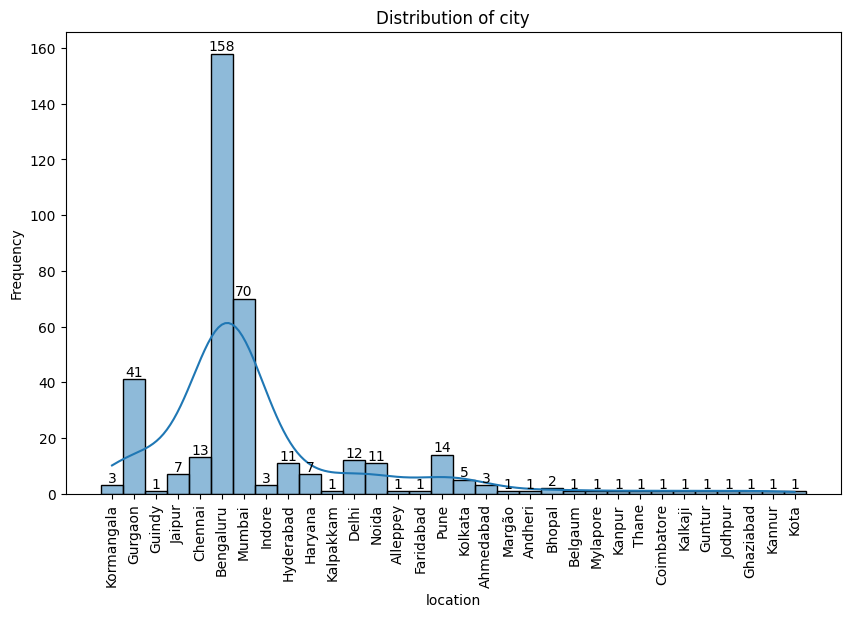

In [37]:
# 2. Distribution of city (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_2018['location'], bins=10, kde=True)
# Add data labels
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribution of city')
plt.xlabel('location')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

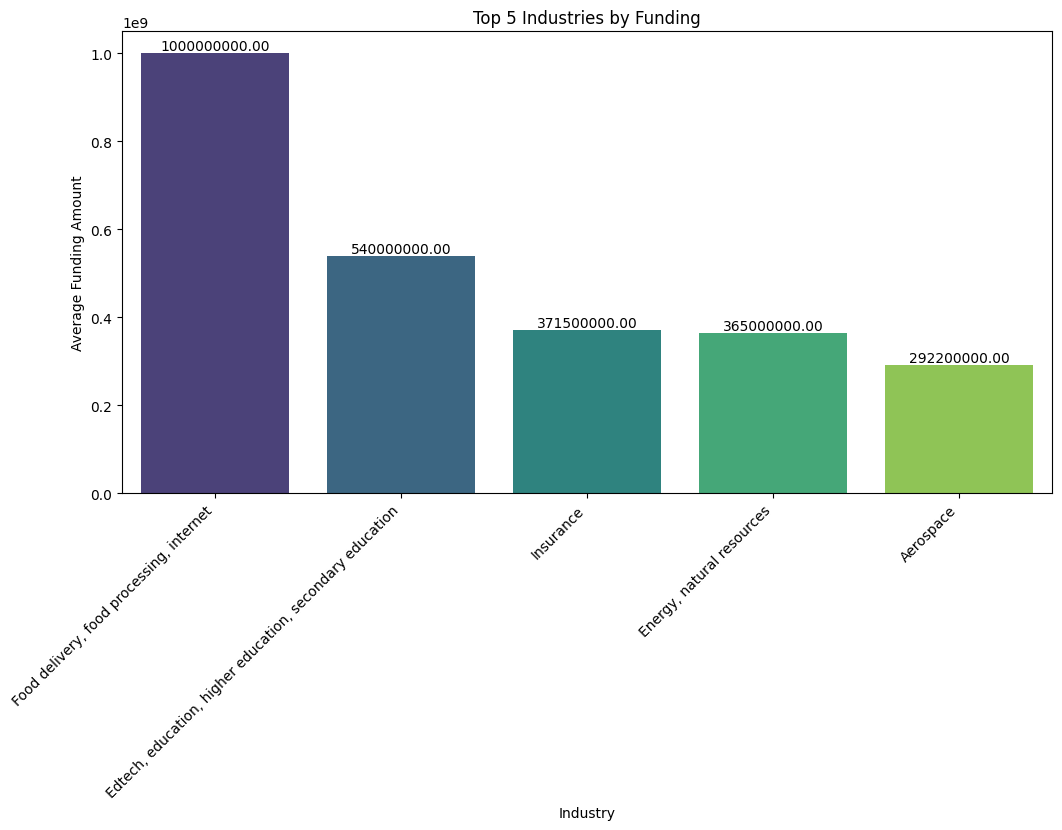

In [38]:
# Top 5 industries
top_industries = df_2018.groupby('industry')['amount'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_industries.index, y=top_industries.values, palette="viridis")
# Adding data labels
for index, value in enumerate(top_industries):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.title('Top 5 Industries by Funding')
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

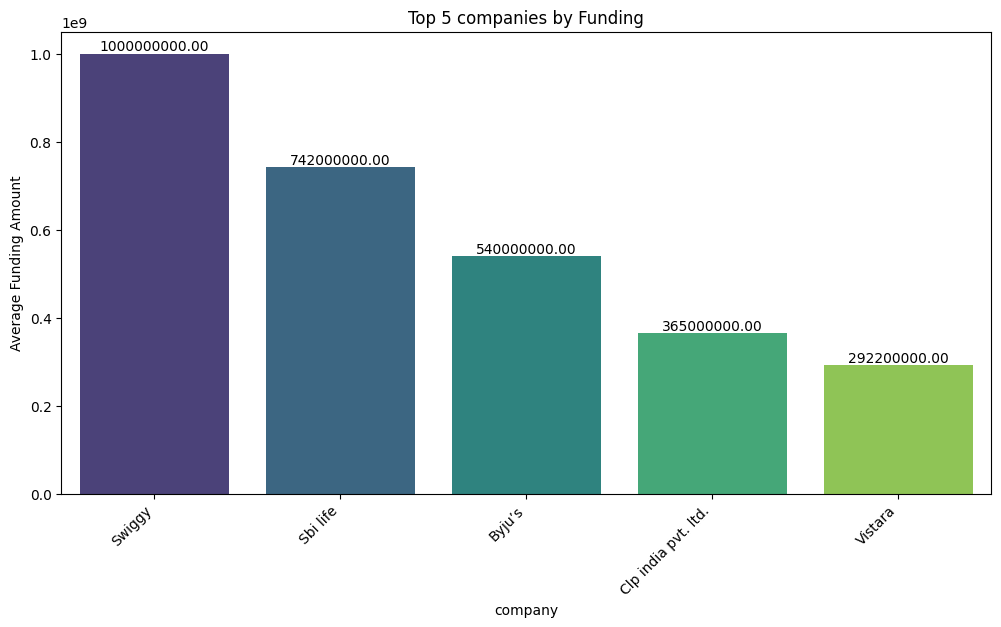

In [39]:
# Top 5 companies
top_companies = df_2018.groupby('company_name')['amount'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")
# Adding data labels
for index, value in enumerate(top_companies):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.title('Top 5 companies by Funding')
plt.xlabel('company')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Summary 2018 Data
1. The series with the highest frequency was 'seed'
2. The Industry with the highest investment in 2018 was insurance
3. The city and state with the highest frequency was Bangalore and Karnataka in the 2018 data set
4. The company with the highest funding was swiggy in 2018 with 1billlion dolars

#### Cleaning 2019 data 


In [52]:
# Checking the 2019 info
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  76 non-null     object 
 1   Founded        52 non-null     float64
 2   HeadQuarter    76 non-null     object 
 3   Sector         71 non-null     object 
 4   What it does   76 non-null     object 
 5   Founders       73 non-null     object 
 6   Investor       76 non-null     object 
 7   Amount($       76 non-null     int64  
 8   Stage          76 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 5.5+ KB


#### Data Overview
The dataset contains information on 76 entry rows across various attributes. Here's a summary of the key details:
  1. Company/Brand: Name of the company or brand. it has 76 non null entries
  2. Founded: Year of establishment. it has 52 non-null entries
  3. HeadQuarter: Location of the company's headquarters. It has 76 non-null entries
  4. Sector: Industry to which the company belongs. It has 71 non-null entries
  5. What it does: Description of the company's activities (76 non-null entries).
  6. Founders:Names of the founders (73 non-null entries).
  7. Investor:Information about investors (76 non-null entries).
  8. Amount($): Funding amount in dollars (76 non-null entries).
  9. Stage: the series of the funding (76 non-null entries).  
    
One column ('Founded') is of float64 data type.   
Eight columns are of object data type.  
There are missing values in columns such as 'Founded', 'HeadQuarter', 'Sector', 'Founders', and 'Stage'.


In [763]:
# Renaming the 2019 data set columns and putting them in lowercase
column_names_2019 = {'Company/Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount($)': 'amount', 'HeadQuarter': 'location', 'What it does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2019 = df_2019.rename(columns=column_names_2019)
df_2019.head()

,company_name,founded,location,industry,about,founders,investor,amount,series
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [764]:
# Checking for duplicated entries
print(f"there are : {df_2019.duplicated().sum()} duplicated values in the 2019 data frame")

there are : 0 duplicated values in the 2019 data frame


In [765]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  89 non-null     object 
 1   founded       60 non-null     float64
 2   location      70 non-null     object 
 3   industry      84 non-null     object 
 4   about         89 non-null     object 
 5   founders      86 non-null     object 
 6   investor      89 non-null     object 
 7   amount        89 non-null     object 
 8   series        43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [766]:
# Cleaning the company_name column
# Checking for unique values
print(f'There are : {df_2019['company_name'].nunique()} unique entries in the company_name column')

There are : 87 unique entries in the company_name column


In [767]:

df_2019['company_name'].value_counts()


company_name
Kratikal            2
Licious             2
Bombay Shaving      1
KredX               1
Euler Motors        1
                   ..
HungerBox           1
Fireflies .ai       1
Toffee Insurance    1
Seekify             1
Ess Kay Fincorp     1
Name: count, Length: 87, dtype: int64

The company_name column appears to be okay as is and does not require further cleaning

In [768]:
# Cleaning the founded column
# Checking The unique values, nunique value, and value counts in the founded column
unique_values = df_2019['founded'].nunique()
null_values = df_2019['founded'].isna().sum()
print(f'The unique values in the founded column are: {unique_values}, '
      f'while the null values are: {null_values}')

The unique values in the founded column are: 12, while the null values are: 29


Observation 
1. The null values in the founded column can be left and not droped
2. The column should be converted to datetiome from object since it hold dates companies were founded

In [769]:
# Converting the founded column to datetime
df_2019['founded'] = pd.to_datetime(df_2019['founded'], format='%Y', errors='coerce')

In [770]:
# Cleaning the location column
# Checking unique values and null values 
print(f' There are : {df_2019['location'].nunique()} unique values in the 2019 data frame location column,'
      f'and : {df_2019['location'].isna().sum()} null values')

 There are : 17 unique values in the 2019 data frame location column,and : 19 null values


In [771]:
# Checking the data sample
df_2019['location'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

Observation
1. The null values in the location will kept 
2. The location column will be renamed to city to conform with 2018 dataset

In [772]:
# renaming the location column to city
df_2019.rename(columns={'location': 'city'}, inplace=True)

In [773]:
# Cleaning the industry column
# Checking unique values and null values 
print(f' There are : {df_2019['industry'].nunique()} unique values in the 2019 data frame Industry column,'
      f'and {df_2019['industry'].isna().sum()} null values')

 There are : 52 unique values in the 2019 data frame Industry column,and 5 null values


In [774]:
# checking industry entries
df_2019['industry'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

The industry column can remain as is because the entries are single entry data for each industry cell

In [775]:
# Checking the about/ founders, investor, and series columns 
print(f' There are : {df_2019['about'].nunique()} unique values in the 2019 data frame about column,'
      f'and {df_2019['about'].isna().sum()} null values\n'
      f' There are : {df_2019['founders'].nunique()} unique values in the 2019 data frame founders column,'
      f'and {df_2019['founders'].isna().sum()} null values\n'
      f' There are : {df_2019['investor'].nunique()} unique values in the 2019 data frame investor column,'
      f'and {df_2019['investor'].isna().sum()} null values\n'
      f' There are : {df_2019['series'].nunique()} unique values in the 2019 data frame series column,'
      f'and {df_2019['series'].isna().sum()} null values')

 There are : 88 unique values in the 2019 data frame about column,and 0 null values
 There are : 85 unique values in the 2019 data frame founders column,and 3 null values
 There are : 86 unique values in the 2019 data frame investor column,and 0 null values
 There are : 15 unique values in the 2019 data frame series column,and 46 null values


In [776]:
# Cleaning the amount column
df_2019['amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

Observations:
1. Mixed Currencies:  
The amounts include both dollars ('$') and 'Undisclosed'.  
'Undisclosed' entries should be addressed, either by removing them or assigning null values.
2. Numeric and Currency Format:  
Numeric values are generally in currency format, such as '$6,300,000'.  
Cleaning involves removing the dollar sign and commas to convert these values into a numeric format.
3. Extreme values:  
There is one extreme value like '$693,000,000', could be outliers. 


In [777]:
# Remove 'Undisclosed' entries 
df_2019['amount'] = df_2019['amount'].replace('Undisclosed', np.nan)
# Remove dollar signs and commas, convert to numeric
df_2019['amount'] = df_2019['amount'].replace('[\$,]', '', regex=True).astype(float)

In [778]:
# adding the data year column for 2019
df_2019['data_year'] = pd.to_datetime('2019', format='%Y')
# Display the updated DataFrame info
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  89 non-null     object        
 1   founded       60 non-null     datetime64[ns]
 2   city          70 non-null     object        
 3   industry      84 non-null     object        
 4   about         89 non-null     object        
 5   founders      86 non-null     object        
 6   investor      89 non-null     object        
 7   amount        77 non-null     float64       
 8   series        43 non-null     object        
 9   data_year     89 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 7.1+ KB


In [779]:
# Checking clean 2019 data-frame
df_2019.head(3)

,company_name,founded,city,industry,about,founders,investor,amount,series,data_year
0,Bombay Shaving,NaT,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019-01-01
1,Ruangguru,2014-01-01,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019-01-01
2,Eduisfun,NaT,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019-01-01


##### Brief EDA on 2019 Data

In [780]:
# 1. Describe the data frame for 2019
df_2019.describe(include='all')

,company_name,founded,city,industry,about,founders,investor,amount,series,data_year
count,89,60,70,84,89,86,89,7.700000e+01,43,89
unique,87,NaN,17,52,88,85,86,NaN,15,NaN
top,Kratikal,NaN,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,NaN,Series A,NaN
freq,2,NaN,21,7,2,2,3,NaN,10,NaN
mean,NaN,2014-07-14 16:00:00,NaN,NaN,NaN,NaN,NaN,4.333030e+07,NaN,2019-01-01 00:00:00
min,NaN,2004-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+05,NaN,2019-01-01 00:00:00
25%,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2.100000e+06,NaN,2019-01-01 00:00:00
50%,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,6.000000e+06,NaN,2019-01-01 00:00:00
75%,NaN,2016-04-01 12:00:00,NaN,NaN,NaN,NaN,NaN,3.000000e+07,NaN,2019-01-01 00:00:00
max,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,6.930000e+08,NaN,2019-01-01 00:00:00


#### Analysis of df_2019 Data Frame
1. Company Name:  There are 89 unique company names.The most common company name is "Kratikal," appearing twice.
2. Founded:  The data reflects the founding dates of 60 companies.The earliest company was founded in 2004.The latest company was founded in 2019.
3. City:  The data includes companies from 17 different cities.Bangalore is the most frequent city, with 21 occurrences.
4. Industry:  There are 52 unique industries represented in the data. Edtech is the most common industry, appearing 7 times.
5. About: There are 89 unique descriptions of companies. The most frequent description is "Online meat shop," appearing twice.
6. Founders:  There are details for 86 founders.Vivek Gupta and Abhay Hanjura are the most frequent founders, appearing twice.
7. Investor:  There are details for 89 unique investors. The most common investor is "Undisclosed," mentioned 3 times.
8. Amount:  Funding amounts are available for 77 companies.The funding amount ranges from $100,000 to $693,000,000.
The average funding amount is $43,330,000.
9. Series:  There are details for 43 unique series.Series A is the most common funding series, occurring 10 times.
10. Data Year: All entries in the data belong to the data collection year 2019.

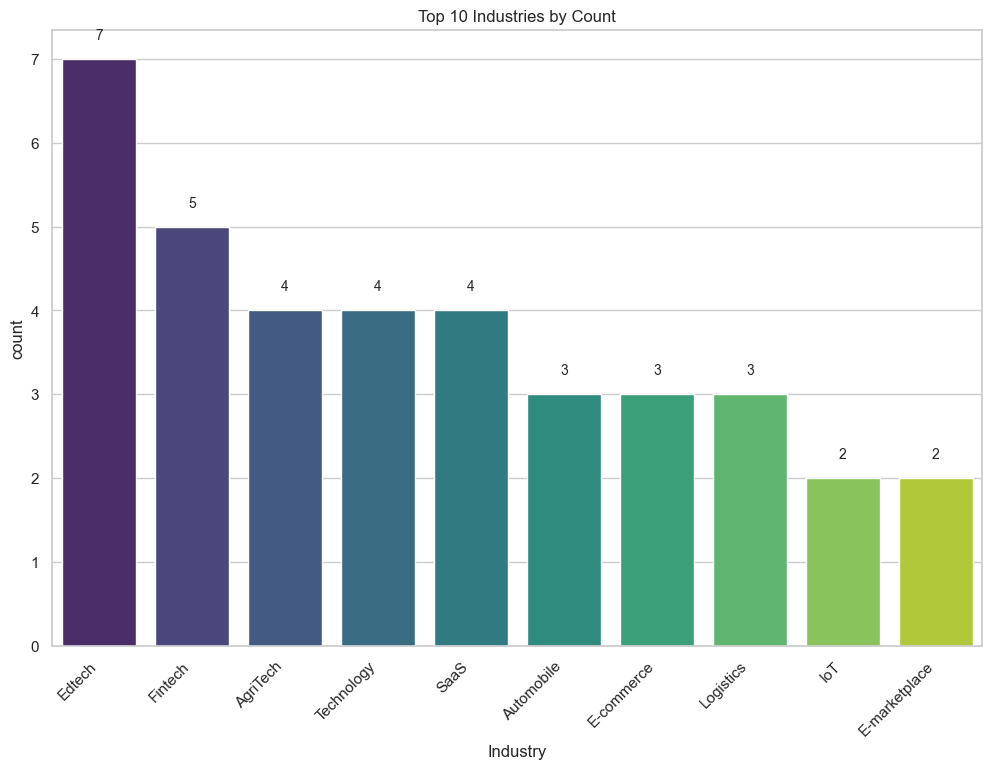

In [781]:
# 1 Distribution of Industries (Bar Chart)
plt.figure(figsize=(12, 8))
industry_distribution = df_2019['industry'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=industry_distribution.index, y=industry_distribution.values, palette='viridis')
plt.title('Top 10 Industries by Count')
plt.xlabel('Industry')
plt.ylabel('count')
# Add data labels to the bar chart
for i, value in enumerate(industry_distribution):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

Edtech is the industry with the highest distribution for 2019

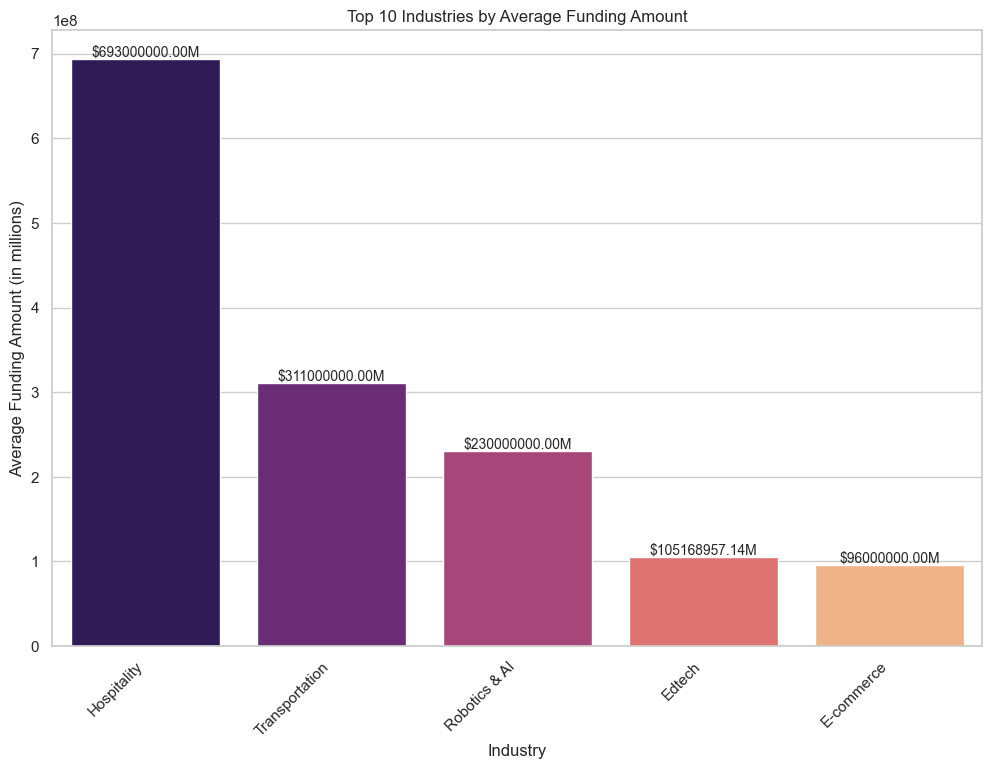

In [782]:
# 2 Average Funding Amount by Industry - Top 5 (Bar Chart)
plt.figure(figsize=(12, 8))
avg_funding_by_industry = df_2019.groupby('industry')['amount'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=avg_funding_by_industry.index, y=avg_funding_by_industry.values, palette='magma')
plt.title('Top 10 Industries by Average Funding Amount')
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount (in millions)')
# Add data labels to the bar chart
for i, value in enumerate(avg_funding_by_industry):
    plt.text(i, value + 0.2, f'${value:.2f}M', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

### Cleaning 2020 data

In [783]:
# Loading the 2020 dat frame 
df_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN


In [784]:
# Checking 2020 information on dataset
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


##### Data Info summary for raw data df_2020  
There are Entries 1055 rows in the dataframe for 2020 and 10 columns  
Column Information:  
1. Company_Brand - 1055 entries and no nulls. all object entries
2. Founded - 842 entries, float d-type, with null values
3. HeadQuarter - 961 entries, object d-type, with null values
4. Sector - 1042 entries, object d-type, with null values
5. What_it_does - 1055 entries and no nulls. all object entries
6. Founders - 1043 entries, object d-type, with null values
7. Investor - 1017 entries, object d-type, with null values
8. Amount - 807 entries, float d-type, with null values
9. Stage - 591 entries, object d-type, with null values
10. column10 - 2 entries, object d-type, with null values - To be dropped since it has no valuable insights

In [785]:
# Cleaning the df_2020 data set
# First converting the column names for readability and consistency with the 2018 and 2019 data
# Dropping the column 10 since its unsusable for any meaningful insights
# Renaming the 2019 data set columns and putting them in lowercase
column_names_2020 = {'Company_Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount': 'amount', 'HeadQuarter': 'city', 'What_it_does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2020 = df_2020.rename(columns=column_names_2020)
# Drop 'column_10', 
df_2020.drop(['column10'], axis=1, inplace=True)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1055 non-null   object 
 1   founded       842 non-null    float64
 2   city          961 non-null    object 
 3   industry      1042 non-null   object 
 4   about         1055 non-null   object 
 5   founders      1043 non-null   object 
 6   investor      1017 non-null   object 
 7   amount        801 non-null    float64
 8   series        591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [786]:
# Checking for duplicates in the 2020 data
print(f'The duplicated rows in 2020 dataframe is {df_2020.duplicated().sum()}')

The duplicated rows in 2020 dataframe is 3


In [787]:
# droping the duplicates
df_2020.drop_duplicates(keep='first', inplace=True)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1052 non-null   object 
 1   founded       839 non-null    float64
 2   city          958 non-null    object 
 3   industry      1039 non-null   object 
 4   about         1052 non-null   object 
 5   founders      1040 non-null   object 
 6   investor      1014 non-null   object 
 7   amount        799 non-null    float64
 8   series        590 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.2+ KB


In [788]:
# Checking the object columns company name, city, industry, about, founders, investor, series for the unique values
columns_2020 = ['company_name', 'city', 'industry', 'about', 'founders', 'investor', 'series']
unique_values_df = df_2020[columns_2020].apply(lambda x: x.nunique())
# Display the DataFrame with unique values
unique_values_df

company_name    905
city             77
industry        302
about           990
founders        927
investor        848
series           42
dtype: int64

Observation  
These unique values provide insights into the diversity and variety present in the dataset across different attributes such as company names, locations, industries, founders, investors, and series categories.
Company Name: There are 905 unique company names in the 2020 dataset.  
City: The 2020 dataset includes information from 77 different cities.  
Industry: There are 302 unique industries represented in the 2020 dataset.  
About: The 'about' column contains 990 unique descriptions about the companies activities.  
Founders: The 2020 dataset lists information about 927 unique founders.  
Investor: There are records for 848 unique investors in the 2020 dataset.
Series: The 'series' column consists of 42 unique series categories for when the funding round occurred.

In [789]:
# Cleaning the Founded column because its a float and should be time series data
# Converting the founded column to datetime
df_2020['founded'] = pd.to_datetime(df_2020['founded'], format='%Y', errors='coerce')

In [790]:
# Cleaning the amount column
# create a variable for 'amount' column to check
amount_column = df_2020['amount']
# Step 1 Check for non-numeric values
non_numeric_values = amount_column[~amount_column.astype(str).str.isnumeric()]
# Step 2 Check for unique non-numeric values
unique_non_numeric_values = non_numeric_values.unique()
# Display the unique non-numeric values
print("Unique Non-Numeric Values in 'amount' column:")
unique_non_numeric_values

Unique Non-Numeric Values in 'amount' column:


array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

Observation  
It appears all the entries in the amount column  are float with no outliers.  
The column will remain as is

In [791]:
# Adding data year column to the 2020 dataset
df_2020['data_year'] = pd.to_datetime('2020', format='%Y')

# List of columns with object data that need to be capitalized
columns_to_capitalize = ['company_name', 'city', 'industry', 'about', 'founders', 'investor', 'series']

# Capitalize the first letter of each string in the specified columns
df_2020[columns_to_capitalize] = df_2020[columns_to_capitalize].apply(lambda x: x.str.capitalize())
# Display the updated DataFrame info
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  1052 non-null   object        
 1   founded       839 non-null    datetime64[ns]
 2   city          958 non-null    object        
 3   industry      1039 non-null   object        
 4   about         1052 non-null   object        
 5   founders      1040 non-null   object        
 6   investor      1014 non-null   object        
 7   amount        799 non-null    float64       
 8   series        590 non-null    object        
 9   data_year     1052 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 90.4+ KB


#### Performing Brief EDA on 2020 clean data

In [792]:
# A brief description of the data frame
df_2020.describe(include='all')

,company_name,founded,city,industry,about,founders,investor,amount,series,data_year
count,1052,839,958,1039,1052,1040,1014,7.990000e+02,590,1052
unique,887,NaN,77,285,990,926,838,NaN,36,NaN
top,Zomato,NaN,Bangalore,Fintech,Provides online learning classes,Falguni nayar,Venture catalysts,NaN,Series a,NaN
freq,6,NaN,316,131,4,5,20,NaN,96,NaN
mean,NaN,2015-05-17 08:22:53.063170560,NaN,NaN,NaN,NaN,NaN,1.126994e+08,NaN,2020-01-01 00:00:00
min,NaN,1973-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN,2020-01-01 00:00:00
25%,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020-01-01 00:00:00
50%,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020-01-01 00:00:00
75%,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.100000e+07,NaN,2020-01-01 00:00:00
max,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,7.000000e+10,NaN,2020-01-01 00:00:00


#### Data Summary (2020)
The Total Records are 1052  
1. Founders and Cities: the unique founders are 905 while the unique cities are 839 with the most common city being Bangalore (316 occurrences)
2. Industries: there are 77 unique industries with the most common industry being Fintech (80 occurrences)
3. Funding Rounds: there was a total of 590 funding rounds with Series A (96 occurrences) being the most common series: 
4. Funding Amount:  
- the Mean funding amount was $112,699,400  
- the Minimum funding amount was $12,700  
- the Maximum funding amount was $70,000,000,000  
- the Funding amount standard deviation: $2,479,695,000
5. Startup Founded Dates: the oldest startup was founded in 1973, while the latestest startup was founded in 2020
6. About Startups: the Top startup was Zomato (6 occurrences) which Provides online learning classes
7. Investors: there was 848 Unique investors with Venture Catalysts (20 occurrences)  
being the investor that had the highest frequency:


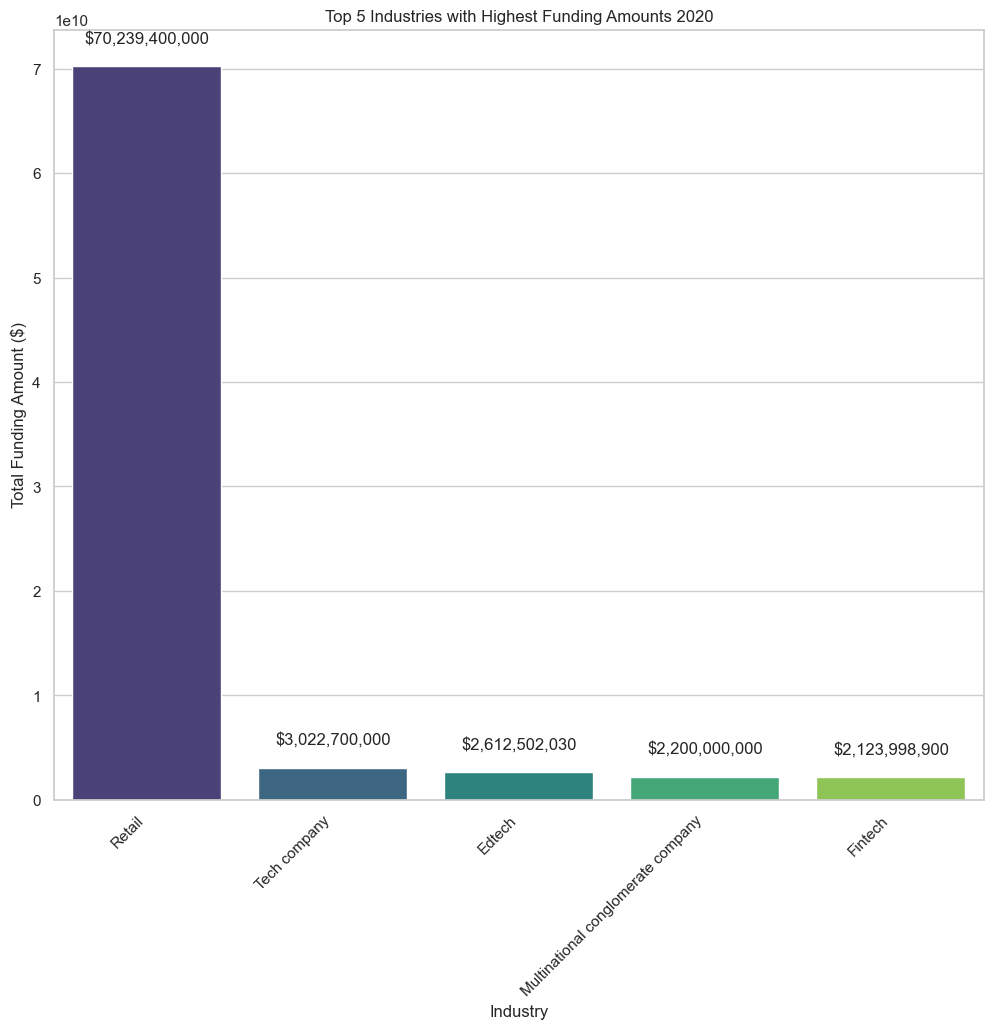

In [793]:
# Filter out rows where 'amount' is not null
df_filtered = df_2020[df_2020['amount'].notnull()]
# Group by 'industry' and calculate the total funding amount for each industry
industry_funding = df_filtered.groupby('industry')['amount'].sum().sort_values(ascending=False)
# Select the top 5 industries
top5_industries = industry_funding.head(5)
# Plot a bar chart for the top 5 industries with the highest funding amounts
plt.figure(figsize=(12, 10))
sns.barplot(x=top5_industries.index, y=top5_industries.values, palette='viridis')
plt.title('Top 5 Industries with Highest Funding Amounts 2020')
plt.xlabel('Industry')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')
# Add data labels
for i, amount in enumerate(top5_industries.values):
    plt.text(i, amount + 0.05 * max(top5_industries.values), f"${amount:,.0f}", ha='center', va='top')
plt.show()

Observation  
Retail Had the highest funding in the year 2020

Top 5 Industries with the Most Companies:
industry
Fintech       109
Edtech         88
Healthtech     40
Agritech       34
E-commerce     30
Name: company_name, dtype: int64


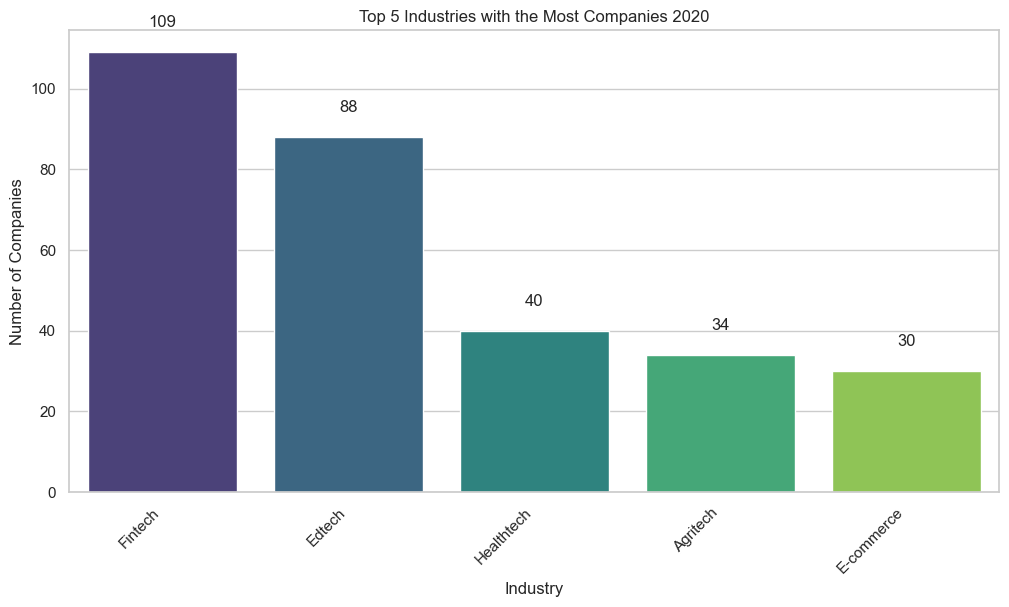

In [794]:
# Group by industry and count unique company names
industry_company_counts = df_2020.groupby('industry')['company_name'].nunique()
# Top 5 industries with the most companies
top5_industries_by_companies = industry_company_counts.nlargest(5)
print("Top 5 Industries with the Most Companies:")
print(top5_industries_by_companies)
# Bar plot for the top 5 industries with the most companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top5_industries_by_companies.index, y=top5_industries_by_companies.values, palette='viridis')
plt.title('Top 5 Industries with the Most Companies 2020')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
# Adding data labels
for i, count in enumerate(top5_industries_by_companies.values):
    plt.text(i, count + 0.05 * max(top5_industries_by_companies.values), str(count), ha='center', va='bottom')
plt.show()

### Cleaning 2021 data

In [795]:
# Viewing 2021 dataframe
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,LearnVern,2016.0,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",NaN,"$1,000,000",NaN
1,Optimized Electrotech,2017.0,Ahmadabad,Aeorspace,"Long distance, multispectral Surveillance Equi...","Anil Yekkala, Dharin Shah, Kuldeep Saxena, Pur...",GVFL,"$1,800,000",Pre-series A
2,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"Sushil Agarwal,JITO Angel Network, LetsVenture",$1000000,NaN
3,MYBYK,2014.0,Ahmadabad,Rental,MYBYK is an app that provides premium bicycle ...,Arjit Soni,Avon Cycles,$1000000,Pre-series A
4,Disruptium,2021.0,Ahmadabad,Consulting,A consultancy platform for startups,"Yash Shah, Kapil Mathrani, Ishit Desai",Pravesh Mehta,"$200,000",NaN


In [796]:
# Checking to see 2021 data info
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1198 non-null   object 
 3   Sector         1208 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1144 non-null   object 
 7   Amount         1207 non-null   object 
 8   Stage          780 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


##### Observation
The provided DataFrame contains information on various companies, including details such as the company's brand name, founding year, headquarters location, sector, a description of what the company does, information about founders and investors, funding amount, and the current stage of the company. Additionally, there is a column labeled "column10" with only 2 non-null entries, which might require further investigation or clarification. The dataset provides insights into the profiles and financial aspects of the represented companies.

In [797]:
# Cleaning the titles of the 2021 data frame 
column_names_2021 = {'Company_Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount': 'amount', 'HeadQuarter': 'city', 'What_it_does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2021 = df_2021.rename(columns=column_names_2021)
# Drop 'column_10', 
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1209 non-null   object 
 1   founded       1208 non-null   float64
 2   city          1198 non-null   object 
 3   industry      1208 non-null   object 
 4   about         1209 non-null   object 
 5   founders      1205 non-null   object 
 6   investor      1144 non-null   object 
 7   amount        1207 non-null   object 
 8   series        780 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [798]:
# Checking for duplicates in the 2021 data
print(f'The duplicated rows in 2021 dataframe is {df_2021.duplicated().sum()}')

The duplicated rows in 2021 dataframe is 19


In [799]:
# droping the duplicates
df_2021.drop_duplicates(keep='first', inplace=True)
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1190 non-null   object 
 1   founded       1189 non-null   float64
 2   city          1182 non-null   object 
 3   industry      1189 non-null   object 
 4   about         1190 non-null   object 
 5   founders      1186 non-null   object 
 6   investor      1126 non-null   object 
 7   amount        1188 non-null   object 
 8   series        768 non-null    object 
dtypes: float64(1), object(8)
memory usage: 93.0+ KB


In [800]:
# List of columns with object data that need to be capitalized
columns_to_capitalize = ['company_name', 'city', 'industry', 'about', 'founders', 'investor', 'series','amount']

# Capitalize the first letter of each string in the specified columns
df_2021[columns_to_capitalize] = df_2021[columns_to_capitalize].apply(lambda x: x.str.capitalize())
# Display the updated DataFrame info
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1190 non-null   object 
 1   founded       1189 non-null   float64
 2   city          1182 non-null   object 
 3   industry      1189 non-null   object 
 4   about         1190 non-null   object 
 5   founders      1186 non-null   object 
 6   investor      1126 non-null   object 
 7   amount        1188 non-null   object 
 8   series        768 non-null    object 
dtypes: float64(1), object(8)
memory usage: 93.0+ KB


In [801]:
# Converting the founded column into datetime
df_2021['founded'] = pd.to_datetime(df_2021['founded'], format='%Y', errors='coerce')

In [802]:
# Cleaning the amount column for 2021
# create a variable for 'amount' column to check
amount_col = df_2021['amount']
# Step 1 Check for non-numeric values
non_numeric_value = amount_col[~amount_col.astype(str).str.isnumeric()]
# Step 2 Check for unique non-numeric values
unique_non_numeric_value = non_numeric_value.unique()
# Display the unique non-numeric values
unique_non_numeric_value

array(['$1,000,000', '$1,800,000', '$1000000', '$200,000', '$300000',
       '$$1,55,000', '$125000000', '$1500000', '$200000', '$30000000',
       '$4500000', '$500,000', '$5000000', '$', '$1,000,000,000',
       '$1,100,000', '$1,200,000', '$1,300,000', '$1,400,000',
       '$1,500,000', '$1,600,000', '$1,700,000', '$10,000,000',
       '$100,000', '$100,000,000', '$100000', '$10000000', '$100000000',
       '$11,000,000', '$1100000', '$11000000', '$12,000,000',
       '$12,500,000', '$120,000,000', '$1200000', '$12000000', '$125,000',
       '$125000', '$13,000,000', '$13,500,000', '$1300000', '$13000000',
       '$135000000', '$14,300,000', '$140,000,000', '$14000000',
       '$144000000', '$145000000', '$15,000,000', '$150,000,000',
       '$150000', '$15000000', '$150000000', '$16,000,000', '$16,500,000',
       '$160,000,000', '$1600000', '$16000000', '$17,000,000', '$1700000',
       '$17500000', '$1800000', '$1900000', '$19000000', '$192000000',
       '$195,000,000', '$2,000,

In [803]:
# Assuming your DataFrame is df_2021 and the column is 'amount'
df_2021['amount'] = df_2021['amount'].replace('[\$,]', '', regex=True)  # Remove $ sign
df_2021['amount'] = pd.to_numeric(df_2021['amount'], errors='coerce', downcast='integer')  # Convert to int, non-numerics become NaN

In [804]:
# Adding data year column to the 2021 dataset
df_2021['data_year'] = pd.to_datetime('2021', format='%Y')

In [805]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  1190 non-null   object        
 1   founded       1189 non-null   datetime64[ns]
 2   city          1182 non-null   object        
 3   industry      1189 non-null   object        
 4   about         1190 non-null   object        
 5   founders      1186 non-null   object        
 6   investor      1126 non-null   object        
 7   amount        1049 non-null   float64       
 8   series        768 non-null    object        
 9   data_year     1190 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 102.3+ KB


From the above, the 2021 data frame seems to be clean enough for analysis

#### Performing EDA on 2021 data

In [806]:
# A brief description of the data frame
df_2021.describe(include='all')

,company_name,founded,city,industry,about,founders,investor,amount,series,data_year
count,1190,1189,1182,1189,1190,1186,1126,1.049000e+03,768,1190
unique,1023,NaN,63,237,1143,1095,929,NaN,27,NaN
top,Bharatpe,NaN,Bangalore,Fintech,Byju's is an educational technology company th...,"Ashneer grover, shashvat nakrani",Inflection point ventures,NaN,Seed,NaN
freq,8,NaN,421,121,4,7,23,NaN,243,NaN
mean,NaN,2016-08-19 22:11:00.050462464,NaN,NaN,NaN,NaN,NaN,1.712188e+08,NaN,2021-01-01 00:00:00
min,NaN,1963-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+04,NaN,2021-01-01 00:00:00
25%,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2021-01-01 00:00:00
50%,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3.500000e+06,NaN,2021-01-01 00:00:00
75%,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.500000e+07,NaN,2021-01-01 00:00:00
max,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.500000e+11,NaN,2021-01-01 00:00:00


## Exploratory Data Analysis (EDA) Notes - df_2021 DataFrame  
### Columns Analysis:
1. company_name  
   - Unique Companies: 1023  
   - Most Frequent: Bharatpe (8 occurrences)  
2. founded  
   - Oldest Company: Founded in 1963  
   - Newest Company: Founded in 2021  
   - Median (50%): 2018
3. city
   - Unique Cities: 68  
   - Most Frequent: Bangalore (421 occurrences)
4. industry  
   - Unique Industries: 239  
   - Most Frequent: Fintech (121 occurrences)  
5. about
   - Unique Descriptions: 1143
6. founders  
   - Unique Founders: 1095  
   - Most Frequent: Ashneer Grover, Shashvat Nakrani (7 occurrences)  
7. investor  
   - Unique Investors: 929  
   - Most Frequent: Inflection Point Ventures (23 occurrences)  
8. amount  
   - Minimum Investment: $10,000  
   - Maximum Investment: $150,000,000,000  
   - Mean Investment: $171,218,800  
   - Median Investment: $3,500,000  
9. series  
   - Unique Series: 27  
### Observations and Recommendations:
1. Data Integrity:  
   - Some columns (`founded`, `city`, `industry`, `founders`, `investor`) have missing values.
   - Considering imputing or handling missing values based on the context.
2. Outliers:  
   - The `amount` column has a wide range, with a maximum of $150 billion. To Check for outliers and consider appropriate handling.
3. Data Cleaning:  
   - Considering cleaning and standardizing text columns (`company_name`, `founders`, `investor`) for consistency.


## Data Merging for analysis
At this point all the four data sets will be merged into one for final cleaning and analysis

In [807]:
# Merging the data
data_frames = [df_2018, df_2019, df_2020, df_2021]

# Concatenate dataframes vertically (along rows)
df = pd.concat(data_frames, ignore_index=True)

In [808]:
# Previewing the info of the merged data-frame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  2856 non-null   object        
 1   industry      2837 non-null   object        
 2   series        1926 non-null   object        
 3   amount        2302 non-null   float64       
 4   about         2856 non-null   object        
 5   city          2735 non-null   object        
 6   state         525 non-null    object        
 7   data_year     2856 non-null   datetime64[ns]
 8   founded       2088 non-null   datetime64[ns]
 9   founders      2312 non-null   object        
 10  investor      2229 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 245.6+ KB


In [810]:
# Previewing the new data frame 
df.head()

,company_name,industry,series,amount,about,city,state,data_year,founded,founders,investor
0,Thecollegefever,Brand marketing,Seed,250000.0,"Thecollegefever is a hub for fun, fiesta and f...",Bangalore,Karnataka,2018-01-01,NaT,NaN,NaN
1,Happy cow dairy,Agriculture,Seed,584000.0,A startup which aggregates milk from dairy far...,Mumbai,Maharashtra,2018-01-01,NaT,NaN,NaN
2,Myloancare,Credit,Series a,949000.0,Leading online loans marketplace in india,Gurgaon,Haryana,2018-01-01,NaT,NaN,NaN
3,Payme india,Fintech,Angel,2000000.0,Payme india is an innovative fintech organizat...,Noida,Uttar pradesh,2018-01-01,NaT,NaN,NaN
4,Eunimart,E-commerce platforms,Seed,NaN,Eunimart is a one stop solution for merchants ...,Hyderabad,Andhra pradesh,2018-01-01,NaT,NaN,NaN


### Cleaning Merged dataframe


#### Cleaning the industry column

In [811]:
df['industry'].unique()

array(['Brand marketing', 'Agriculture', 'Credit', 'Fintech',
       'E-commerce platforms', 'Cloud infrastructure', 'Internet',
       'Market research', 'Information services', 'Mobile payments',
       'B2b', 'Apps', 'Food delivery', 'Industrial automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial intelligence',
       'Internet of things', 'Air transportation', 'Financial services',
       'Food and beverage', 'Autonomous vehicles', 'Enterprise software',
       'Logistics', 'Insurance', 'Information technology', 'Blockchain',
       'Education', 'E-commerce', 'Renewable energy', 'E-learning',
       'Clean energy', 'Transportation', 'Fitness', 'Hospitality',
       'Media and entertainment', 'Broadcasting', 'Edtech', 'Health care',
       '—', 'Sports', 'Big data', 'Cloud computing', 'Food processing',
       'Trading platform', 'Consumer goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer applications'

In [812]:
# Creating a function to map industries to their respective categories
def map_industry_to_category(industry):
    if pd.isna(industry):  # Checks if industry is NaN
        return 'Other'
    industry = industry.lower()
    if any(keyword in industry for keyword in ['credit', 'fintech', 'banking', 'credit cards', 'financial services']):
        return 'Finance'
    elif any(keyword in industry for keyword in ['cloud infrastructure', 'internet', 'information services', 'information technology', 'blockchain', 'artificial intelligence', 'internet of things', 'embedded systems']):
        return 'Technology'
    elif any(keyword in industry for keyword in ['e-commerce platforms', 'marketplace', 'consumer applications', 'digital media', 'online media']):
        return 'E-commerce'
    elif any(keyword in industry for keyword in ['health care', 'health diagnostics', 'medical', 'veterinary']):
        return 'Healthcare'
    elif any(keyword in industry for keyword in ['industrial automation', 'automotive', 'aerospace', '3d printing']):
        return 'Manufacturing'
    elif any(keyword in industry for keyword in ['food and beverage', 'consumer goods', 'consumer electronics', 'retail']):
        return 'Retail'
    elif any(keyword in industry for keyword in ['air transportation', 'autonomous vehicles', 'logistics', 'transportation', 'travel', 'tourism']):
        return 'Transportation'
    elif any(keyword in industry for keyword in ['education', 'edtech', 'e-learning']):
        return 'Education'
    elif any(keyword in industry for keyword in ['renewable energy', 'clean energy', 'energy']):
        return 'Energy'
    elif any(keyword in industry for keyword in ['media and entertainment', 'digital entertainment', 'music streaming', 'podcast']):
        return 'Media and Entertainment'
    elif any(keyword in industry for keyword in ['brand marketing', 'consulting', 'advisory firm', 'business development']):
        return 'Consulting'
    elif any(keyword in industry for keyword in ['food delivery', 'food processing', 'hospitality', 'wellness', 'beauty', 'fitness']):
        return 'Food and Hospitality'
    elif any(keyword in industry for keyword in ['market research', 'big data', 'business intelligence']):
        return 'Market Research'
    elif any(keyword in industry for keyword in ['communities', 'social platform', 'community', 'environmental service']):
        return 'Social and Community'
    elif any(keyword in industry for keyword in ['Agriculture']):
        return 'Agriculture'
    else:
        return 'Other'
# Applying the mapping function to create a new 'clean_industry' column
df['clean_industry'] = df['industry'].apply(map_industry_to_category)
# Checking the result
print(df[['industry', 'clean_industry']].head())

               industry clean_industry
0       Brand marketing     Consulting
1           Agriculture          Other
2                Credit        Finance
3               Fintech        Finance
4  E-commerce platforms     E-commerce


## Performing EDA on the merged dataframe

In [813]:
# The data frame description
df.describe(include = 'all')

,company_name,industry,series,amount,about,city,state,data_year,founded,founders,investor,clean_industry
count,2856,2837,1926,2.302000e+03,2856,2735,525,2856,2088,2312,2229,2856
unique,2166,559,73,NaN,2692,134,18,NaN,NaN,2000,1772,15
top,Bharatpe,Fintech,Seed,NaN,Byju's is an educational technology company th...,Bangalore,Karnataka,NaN,NaN,"Ashneer grover, shashvat nakrani",Inflection point ventures,Other
freq,10,265,601,NaN,5,859,166,NaN,NaN,7,34,1628
mean,NaN,NaN,NaN,1.214741e+08,NaN,NaN,NaN,2020-01-07 22:25:42.857142784,2016-01-25 19:24:08.275862016,NaN,NaN,NaN
min,NaN,NaN,NaN,8.760000e+02,NaN,NaN,NaN,2018-01-01 00:00:00,1963-01-01 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+06,NaN,NaN,NaN,2020-01-01 00:00:00,2015-01-01 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000e+06,NaN,NaN,NaN,2020-01-01 00:00:00,2017-01-01 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.200000e+07,NaN,NaN,NaN,2021-01-01 00:00:00,2019-01-01 00:00:00,NaN,NaN,NaN
max,NaN,NaN,NaN,1.500000e+11,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN


#### DataFrame Analysis
This dataframe contains information about various companies, including details such as company name, industry, funding series, funding amount, description, location (city and state), data year, founding date, founders, investors, and a clean version of the industry.
1. Company Name: The dataframe consists of 2856 entries with 2166 unique company names. The most frequent company name is "Bharatpe" with 10 occurrences.
2. Industry: There are 2837 non-null entries in the industry column, distributed across 559 unique industries. "Fintech" is the most common industry, appearing 265 times.
3. Funding Series: There are 1926 non-null entries indicating the funding series, with 73 unique series. The most common series is "Seed", occurring 601 times.
4. Amount (USD): The funding amount column contains 2302 non-null entries, with the minimum funding amount being $876 and the maximum being $150 billion. The mean funding amount is approximately $121.47 million, with a standard deviation of around $3.45 billion.
5. About: The about column provides descriptions of the companies, with 2692 unique descriptions. The top description mentions "Byju's," an educational technology company.
6. Location (City and State): The dataframe includes information about the location of companies, with 2735 non-null entries for cities and 525 non-null entries for states. The most frequent city is Bangalore, Karnataka, occurring 859 times.
7. Data Year: The data spans from 2018 to 2021, with a majority of entries falling in the year 2020.
8. Founding Date: The founding date of companies ranges from 1963 to 2021, with a mean founding date of January 25, 2016.
9. Founders: The dataframe contains information about the founders of companies, with 2312 non-null entries.
10. Investors: There are 2229 non-null entries for investors.
11. Clean Industry: The clean industry column has 15 unique categories.
Overall, the dataframe provides comprehensive insights into the landscape of companies, their industries, funding details, and locations.

##### Droping unsusable columns
The columns to be droped include , 'founders', 'about', 'industry' and 'investor'. This is because the data in this columns will not be used for any analyisis in the questions.

In [814]:
# Drop the specified columns from the DataFrame
df.drop(columns=['founders', 'about', 'industry', 'investor'], inplace=True)

In [815]:
# Viewing the new df data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company_name    2856 non-null   object        
 1   series          1926 non-null   object        
 2   amount          2302 non-null   float64       
 3   city            2735 non-null   object        
 4   state           525 non-null    object        
 5   data_year       2856 non-null   datetime64[ns]
 6   founded         2088 non-null   datetime64[ns]
 7   clean_industry  2856 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 178.6+ KB


## HYPOTHESIS TESTING 
I want to answer the following hypothesis  
1. Null Hypothesis (HO) - The amount of funding for companies is not influenced by the company's industry.  
2. Alternate Hypothesis (H1) - The amount of funding for companies is influenced by the company's industry.  

In [827]:

# Drop rows where either 'industry' or 'amount' is null
df_cleaned = df.dropna(subset=['clean_industry', 'amount'])
# Perform ANOVA
f_statistic, p_value = f_oneway(*[group['amount'] for name, group in df_cleaned.groupby('clean_industry')])
# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)
# Set the significance level (e.g., 0.05)
alpha = 0.05
# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the amount of funding is influenced by the company's industry.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the amount of funding is influenced by the company's industry.")

F-statistic: 0.7422597251300063
P-value: 0.7327512528845155
Fail to reject the null hypothesis. There is no significant evidence that the amount of funding is influenced by the company's industry.


##### Observation of Hypothesis test
Since the p-value (0.73275) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means that there is no significant evidence to suggest that the amount of funding is influenced by the company's industry.  
In other words, based on the analysis, there is insufficient statistical evidence to conclude that the industry of a company has a significant impact on the amount of funding it receives. The result suggests that factors other than industry may play a more dominant role in determining the funding amount for companies. Further investigation or analysis may be required to identify these factors.

### Further analysis on data

In [817]:
# Checking new dataframe
df.head()

,company_name,series,amount,city,state,data_year,founded,clean_industry
0,Thecollegefever,Seed,250000.0,Bangalore,Karnataka,2018-01-01,NaT,Consulting
1,Happy cow dairy,Seed,584000.0,Mumbai,Maharashtra,2018-01-01,NaT,Other
2,Myloancare,Series a,949000.0,Gurgaon,Haryana,2018-01-01,NaT,Finance
3,Payme india,Angel,2000000.0,Noida,Uttar pradesh,2018-01-01,NaT,Finance
4,Eunimart,Seed,NaN,Hyderabad,Andhra pradesh,2018-01-01,NaT,E-commerce


### Answering business questions

Question 1:  How does the distribution of funding amounts vary across different industries?

#### Using a pie chart

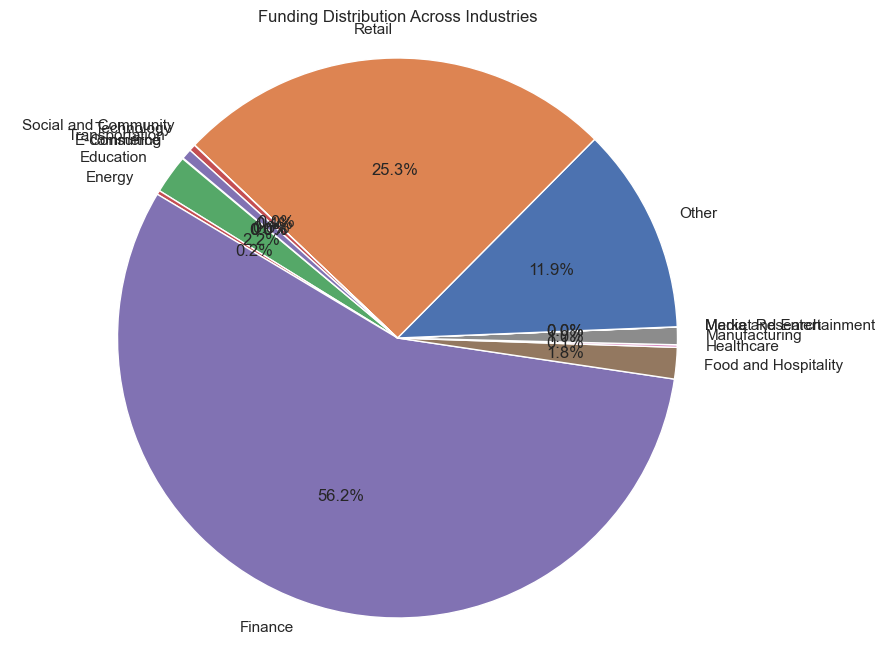

In [818]:
# Calculate the total funding amount for each clean industry
industry_funding = df.groupby('clean_industry')['amount'].sum()
# Create a pie chart to visualize the funding distribution
plt.figure(figsize=(10, 8))
plt.pie(industry_funding, labels=industry_funding.index, autopct='%1.1f%%', startangle=140)
plt.title('Funding Distribution Across Industries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The above shows that finance 56.2% had the highest frequency of funding and then retail. This means there is a higher chance of getting funding in the finance industry than any other.

#### Using a violin plot

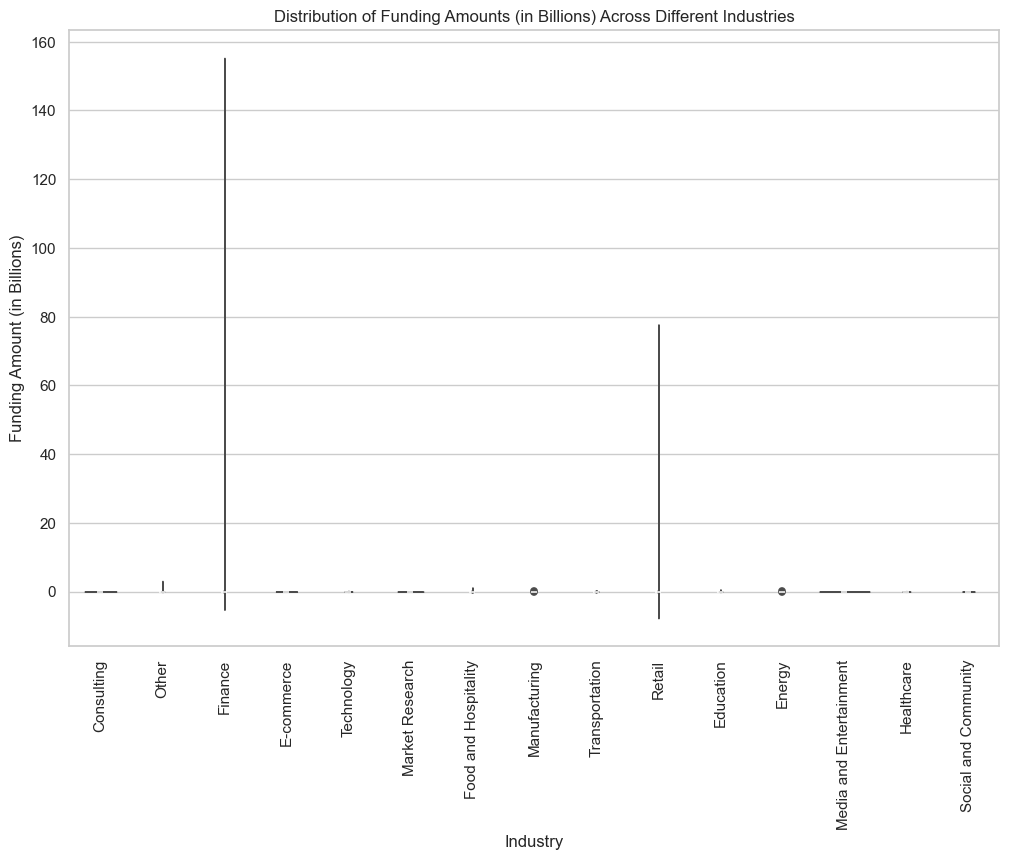

In [819]:
# Convert funding amounts to billions
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a violin plot to visualize the distribution of funding amounts (in billions) across different industries
plt.figure(figsize=(12, 8))
sns.violinplot(x='clean_industry', y='amount_in_billions', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Funding Amounts (in Billions) Across Different Industries')
plt.xlabel('Industry')
plt.ylabel('Funding Amount (in Billions)')
plt.show()

Question 2:  Are certain industries more consistent in funding amounts, indicating stability or predictability?

#### Using a line plot

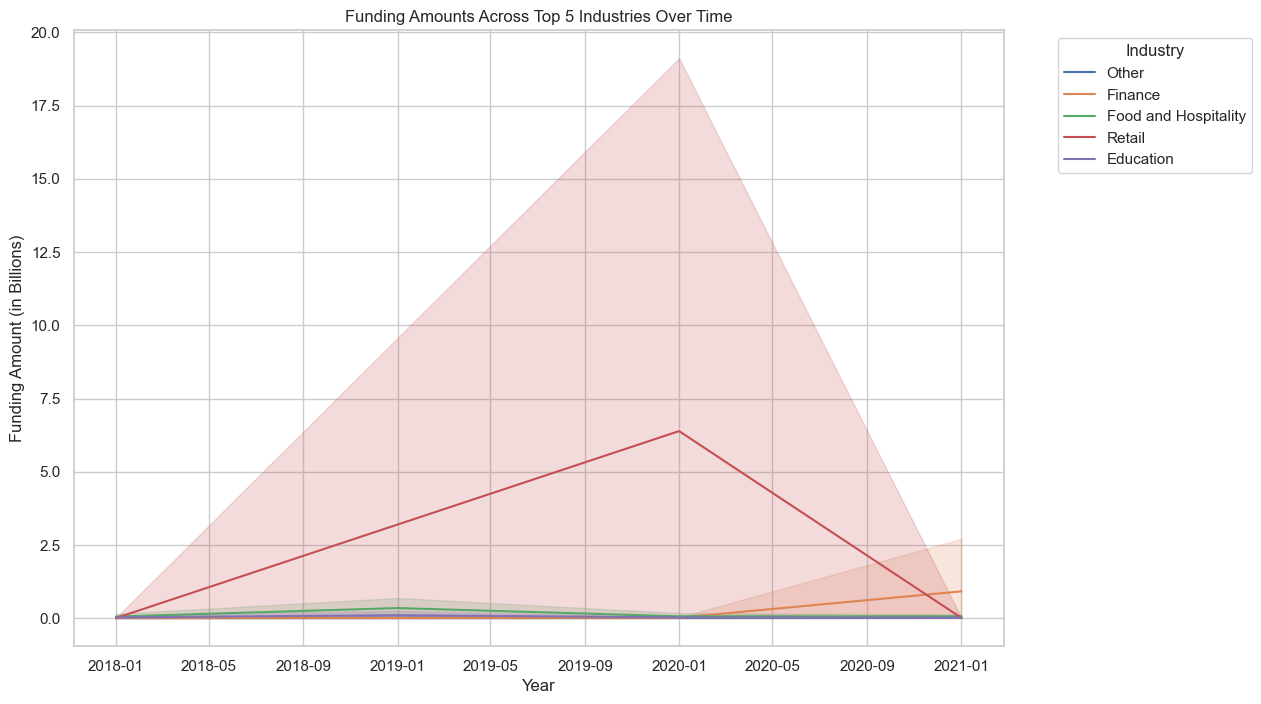

In [820]:
# Calculate the total funding amount for each clean industry
industry_funding = df.groupby('clean_industry')['amount'].sum()

# Sort the industries based on their total funding amounts in descending order and get the top 5
top_5_industries = industry_funding.nlargest(5).index

# Filter the DataFrame to include only data related to the top 5 industries
df_top_5 = df[df['clean_industry'].isin(top_5_industries)]

# Convert funding amounts to billions
df_top_5['amount_in_billions'] = df_top_5['amount'] / 1e9  # Divide by 1 billion

# Create a line plot to visualize the funding amounts for each of the top 5 industries over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='data_year', y='amount_in_billions', hue='clean_industry', data=df_top_5)
plt.title('Funding Amounts Across Top 5 Industries Over Time')
plt.xlabel('Year')
plt.ylabel('Funding Amount (in Billions)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

To be re done

Question 3. Can we identify specific industries that tend to attract higher funding amounts?

#### Using a barplot

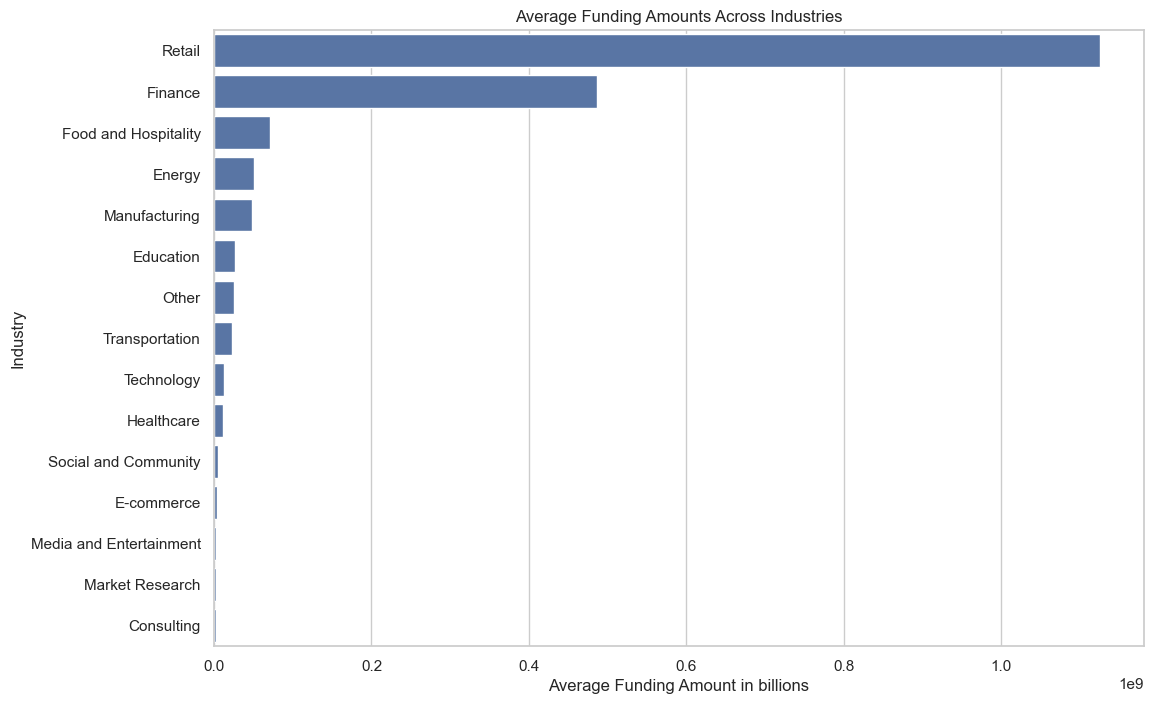

In [821]:
# Calculate the average funding amount for each industry
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion
industry_avg_funding = df.groupby('clean_industry')['amount'].mean().reset_index()

# Sort the industries based on their average funding amount in descending order
industry_avg_funding_sorted = industry_avg_funding.sort_values(by='amount', ascending=False)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot to visualize the average funding amounts for each industry
plt.figure(figsize=(12, 8))
sns.barplot(x='amount', y='clean_industry', data=industry_avg_funding_sorted)
plt.title('Average Funding Amounts Across Industries')
plt.xlabel('Average Funding Amount in billions')
plt.ylabel('Industry')
plt.show()

From the above visual, Retail industry had the highest funding than the rest

#### Question 4. Are there outliers in the funding amounts within certain industries?

#### Using a boxplot

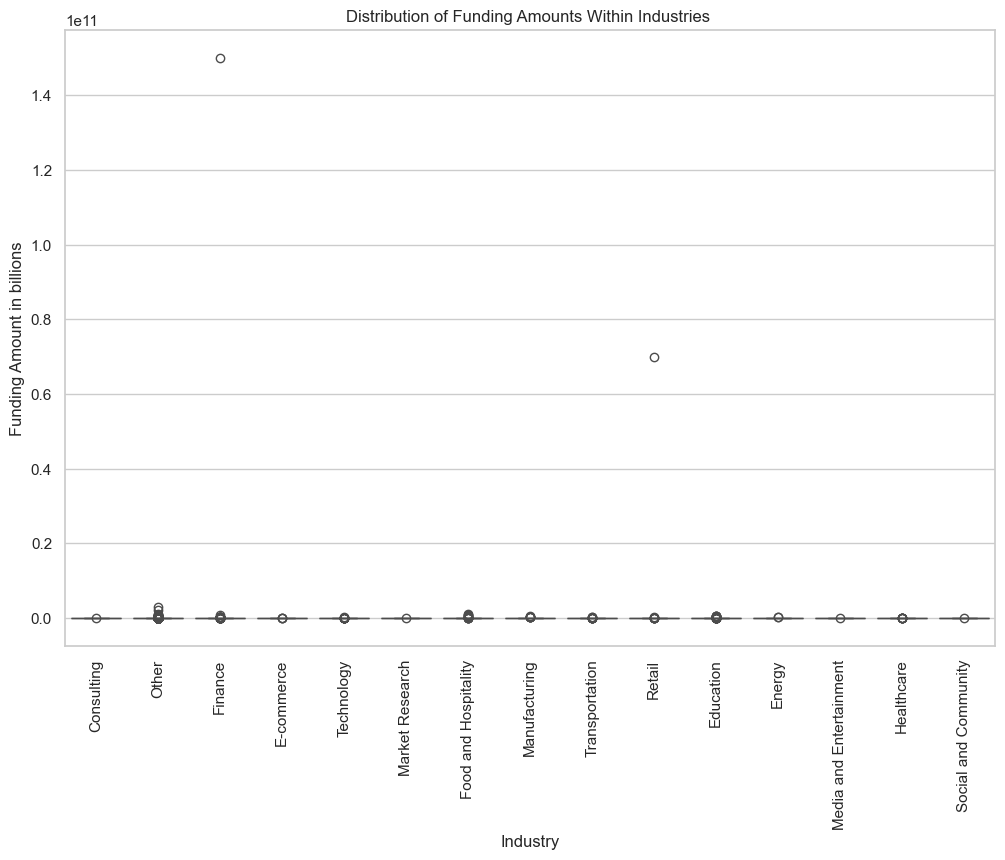

In [822]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Convert funding amounts to billions
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion

# Create a box plot to visualize the distribution of funding amounts within each industry
plt.figure(figsize=(12, 8))
sns.boxplot(x='clean_industry', y='amount', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Funding Amounts Within Industries ')
plt.xlabel('Industry')
plt.ylabel('Funding Amount in billions')
plt.show()

There are outliers in the Finanace and retail industries receiving unusually high funding than the rest

#### Question 5. Does the location influence the funding in certain industries

#### Using boxplot for states

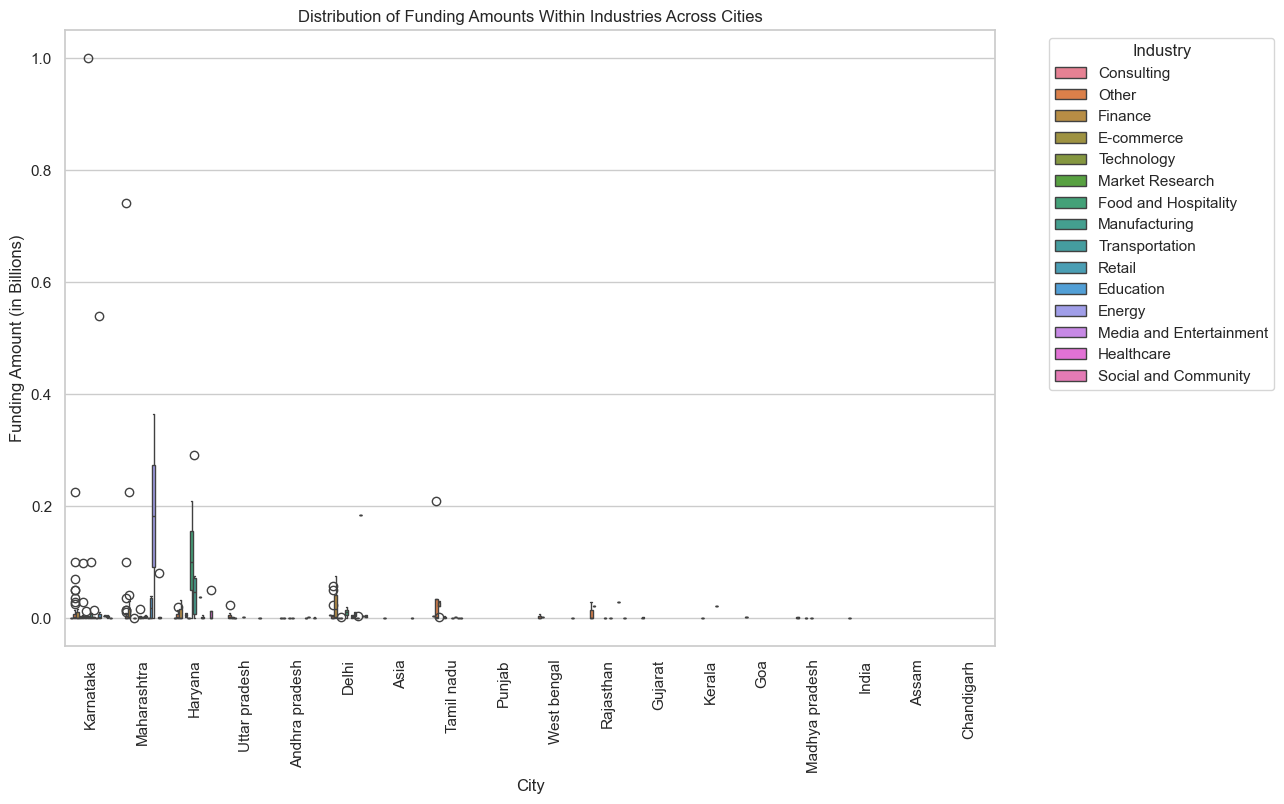

In [823]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot to visualize the distribution of funding amounts within each industry across cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='amount_in_billions', hue='clean_industry', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Funding Amounts Within Industries Across Cities')
plt.xlabel('City')
plt.ylabel('Funding Amount (in Billions)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Using bar plot for cities

In [824]:
# Convert funding amounts to billions
df['amount_in_billions'] = df['amount'] / 1e9  # Divide by 1 billion
# Group the data by city and sum up the funding amounts
city_funding = df.groupby('city')['amount'].sum()

# Sort the cities based on their total funding amounts in descending order
city_funding_sorted = city_funding.sort_values(ascending=False)

# Display the cities with the highest funding
print(city_funding_sorted.head())

city
Mumbai        2.306864e+11
Bangalore     2.384487e+10
Gurugram      5.548232e+09
New delhi     3.416521e+09
California    3.078300e+09
Name: amount, dtype: float64


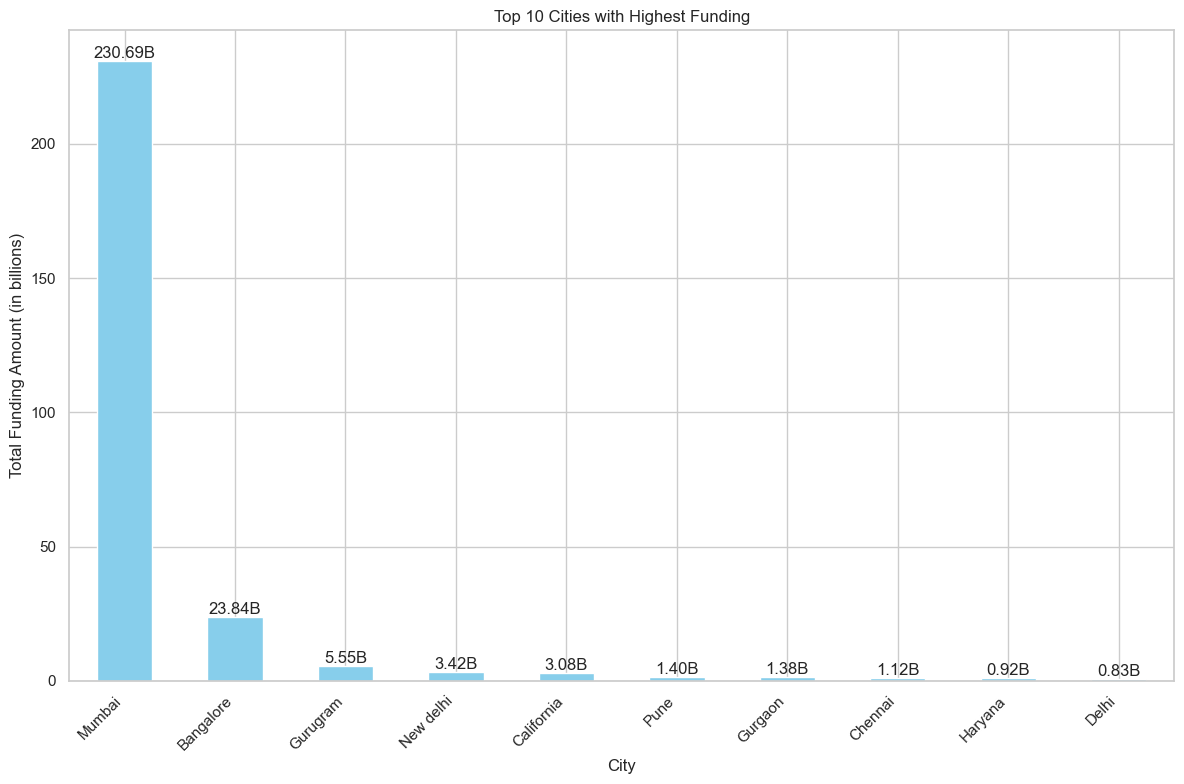

In [825]:
#Convert the funding amounts to billions
city_funding_billion = city_funding_sorted.head(10) / 1_000_000_000  # Convert to billions

# Plot the cities with the highest funding
plt.figure(figsize=(12, 8))
city_funding_billion.plot(kind='bar', color='skyblue')

# Add data labels to the bars
for i, amount in enumerate(city_funding_billion):
    plt.text(i, amount, f'{amount:.2f}B', ha='center', va='bottom')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Funding Amount (in billions)')
plt.title('Top 10 Cities with Highest Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()